In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
upload_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/upload_eval.csv'
upload = pd.read_csv(upload_csv_path)
upload['remain_upload_time'] = upload['upload_time'] - upload['obfuscation_time'] - upload['generate_fake_rows_time']-upload["db_query_time"]-upload["db_write_time"]
print(upload)
upload_bar = upload[['generate_fake_rows_time','obfuscation_time','db_query_time','db_write_time','remain_upload_time','fake_data_rows']]
upload_bar = upload_bar.sort_values(by=['fake_data_rows'])

    data_per_true  real_data_rows  fake_data_rows  generate_fake_rows_time  \
0              10           10000           90000                 5.498273   
1              10              10              90                 0.009430   
2              10          100000          900000                53.310956   
3              10               1               9                 0.003015   
4              10             100             900                 0.075487   
5              10            1000            9000                 0.588548   
6              10           10000           90000                 6.002618   
7              10              10              90                 0.007560   
8              10          100000          900000                54.332948   
9              10               1               9                 0.007171   
10             10             100             900                 0.083804   
11             10            1000            9000               

<Axes: ylabel='fake_data_rows'>

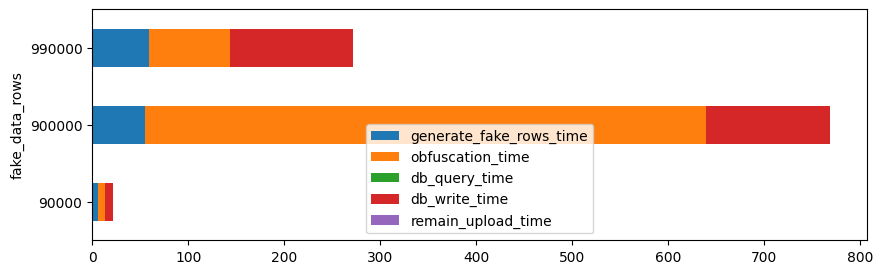

In [5]:
bigger_part = upload_bar.loc[upload_bar['fake_data_rows'] >= 90000]
bigger_part = bigger_part.groupby('fake_data_rows').mean()
bigger_part.plot.barh(stacked=True,figsize=(10,3))

<Axes: ylabel='fake_data_rows'>

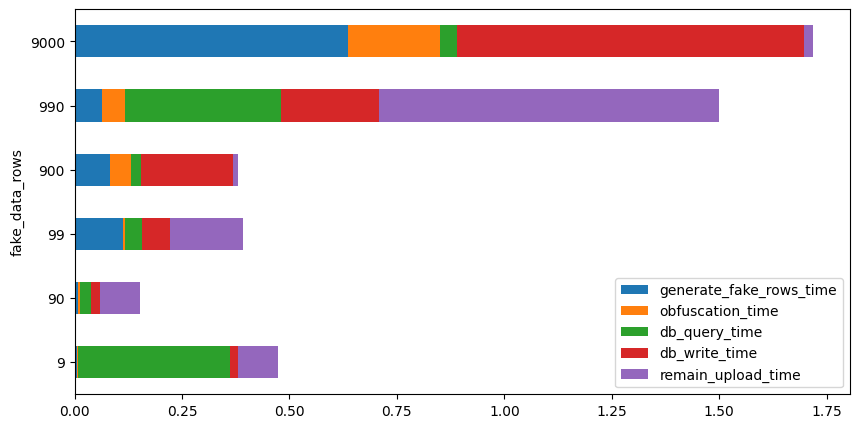

In [6]:
smaller_part = upload_bar.loc[upload_bar['fake_data_rows'] < 90000]
smaller_part = smaller_part.groupby('fake_data_rows').mean()
smaller_part.plot.barh(stacked=True,figsize=(10,5))

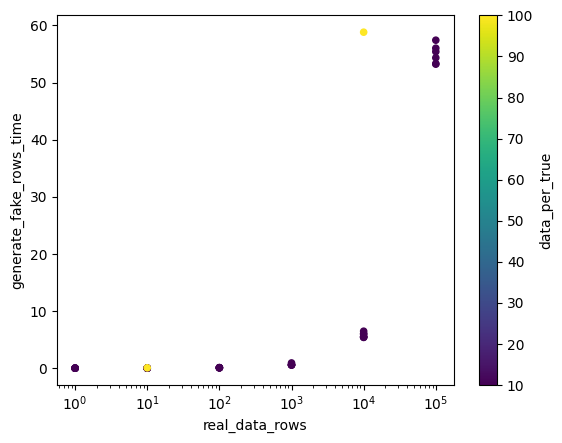

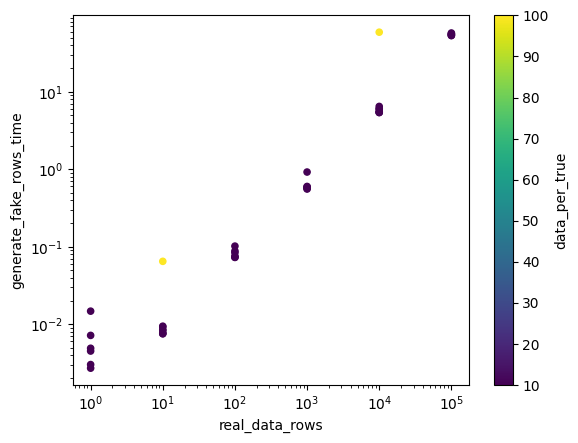

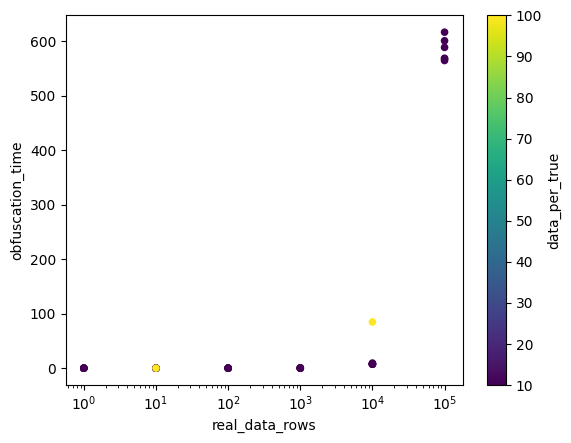

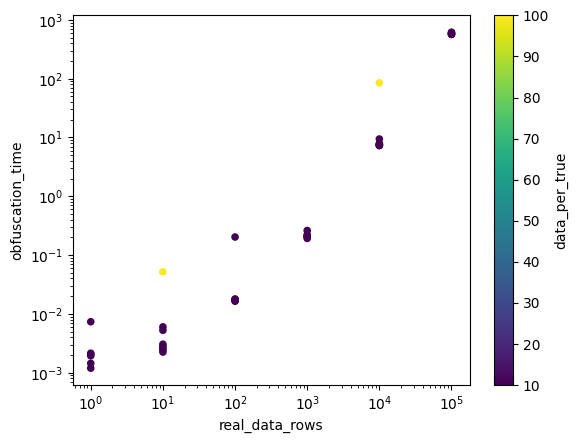

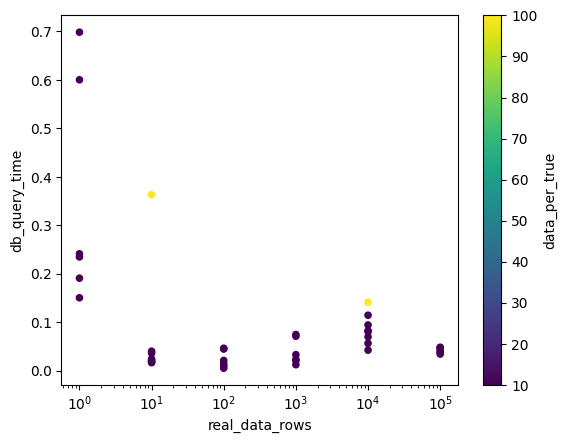

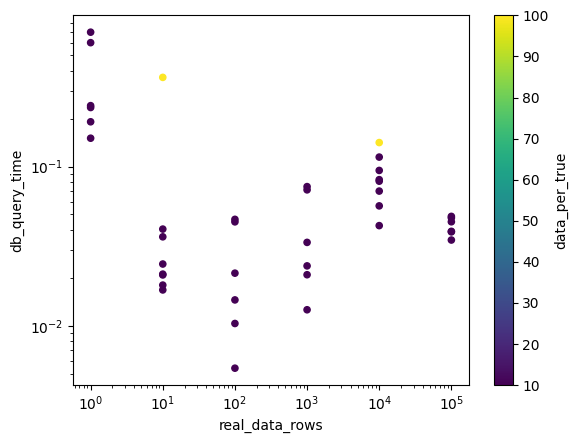

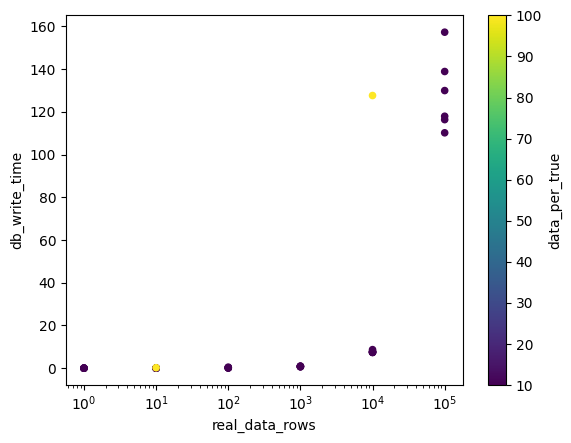

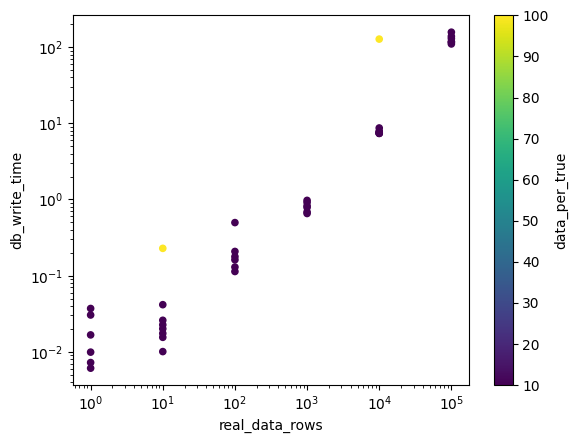

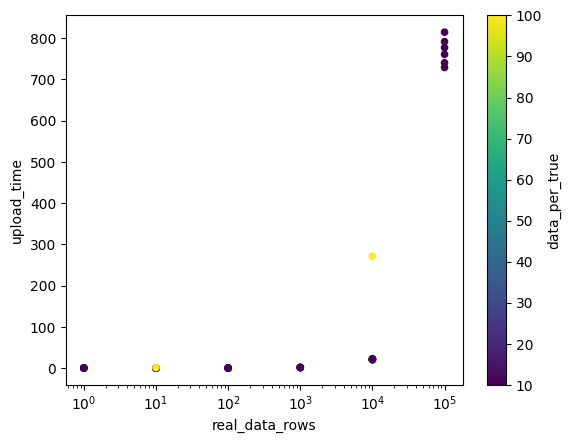

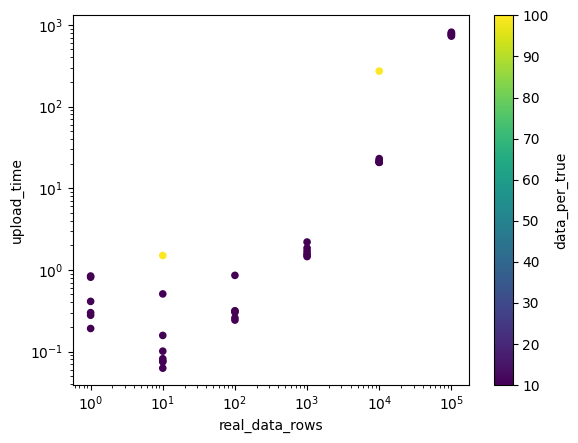

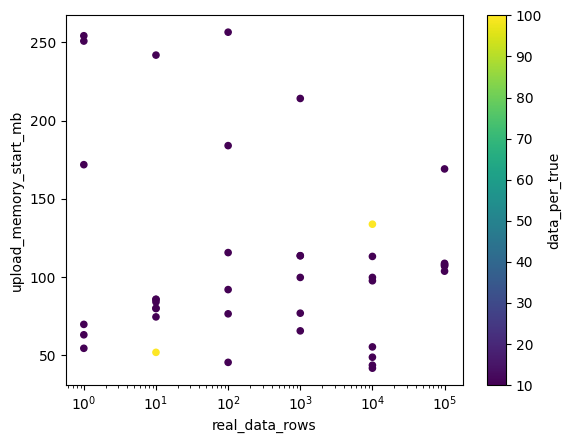

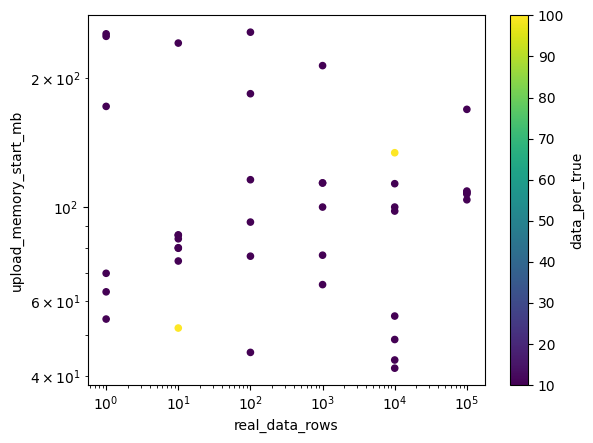

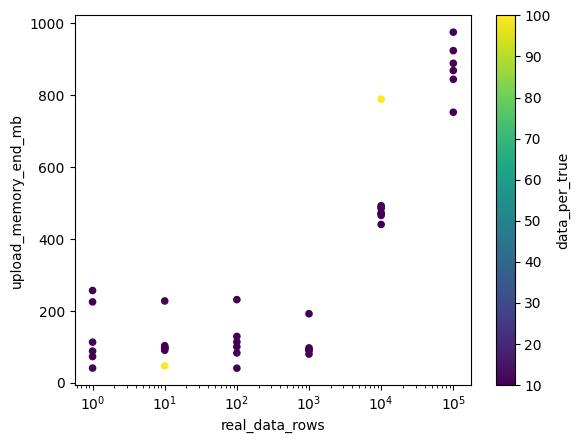

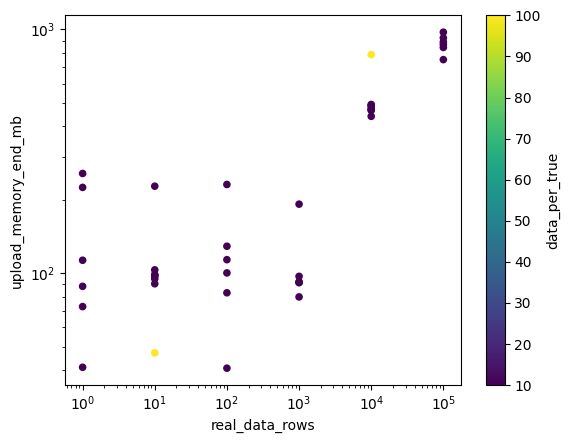

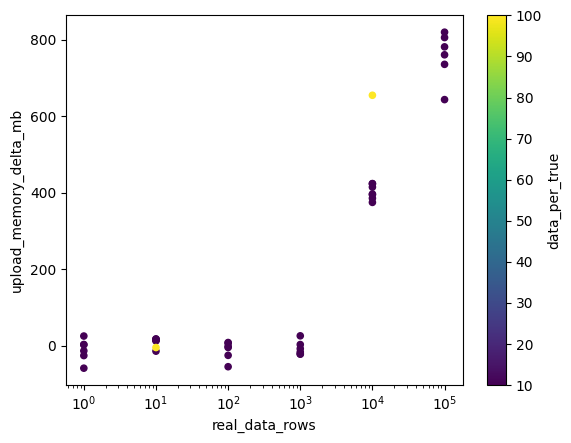

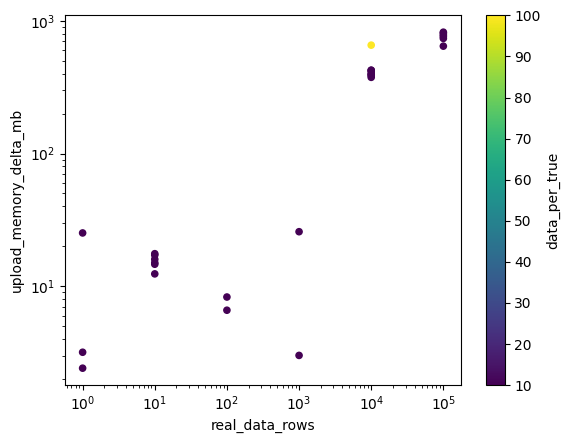

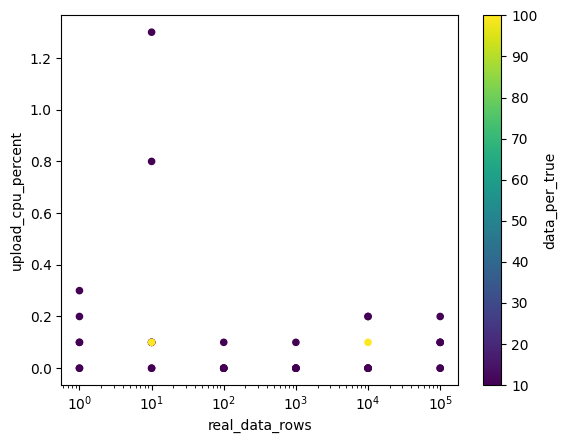

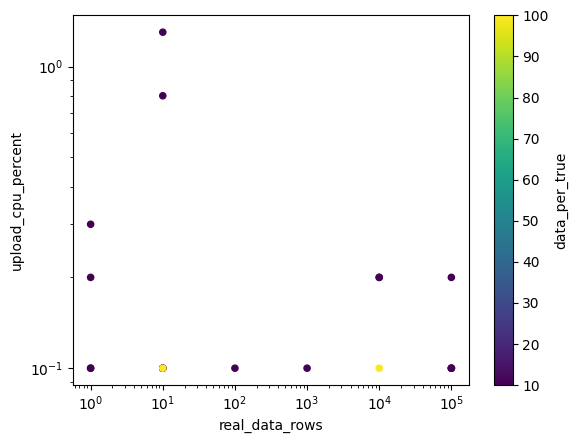

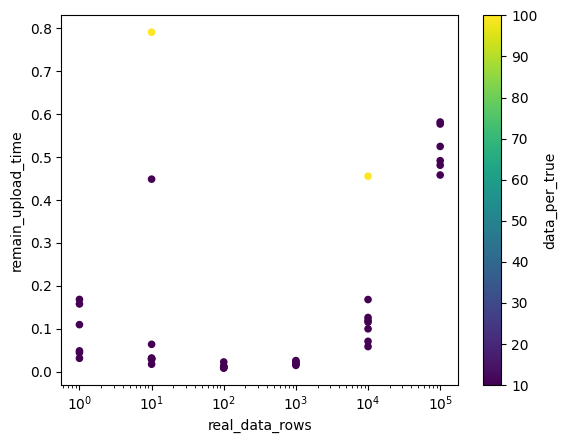

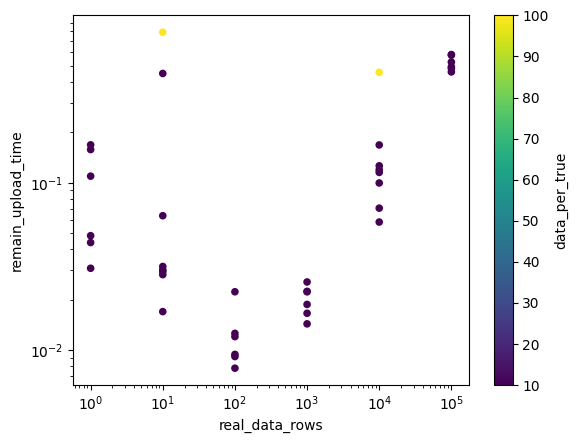

In [15]:
unused_col = ['data_per_true', 'real_data_rows', 'fake_data_rows']
for i, col in enumerate(upload.columns):
    if col in unused_col:
        continue
    ax = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax.set_xscale('log')
    ax1 = upload.plot.scatter(x='real_data_rows', y=col,c='data_per_true',colormap='viridis')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
  
    



In [16]:
read_csv_path = '/Users/jingtingdai/Desktop/Master_Thesis/test/app/backend/read_eval.csv'
read = pd.read_csv(read_csv_path)
read["remain_read_time"] = read["read_real_data_time"] - read["deobfuscation_time"] - read["db_query_time"]
print(read)
read_bar = read[['deobfuscation_time','db_query_time','remain_read_time','total_read_rows']]
read_bar = read_bar.sort_values(by=['total_read_rows'])

    read_real_data_time  db_query_time  deobfuscation_time  total_read_rows  \
0              0.213028       0.149154            0.043306            10000   
1              0.013672       0.003664            0.000078               10   
2              2.538697       2.031931            0.370525           100000   
3              0.035132       0.006837            0.000069                1   
4              0.028309       0.006107            0.001394              100   
5              0.051460       0.018639            0.004421             1001   
6              0.707804       0.590994            0.042499            10000   
7              0.014152       0.005917            0.000197               10   
8              2.738860       2.212148            0.374187           100000   
9              0.439180       0.007760            0.000062                1   
10             0.026427       0.009041            0.000591              100   
11             0.075519       0.032701            0.

<Axes: ylabel='total_read_rows'>

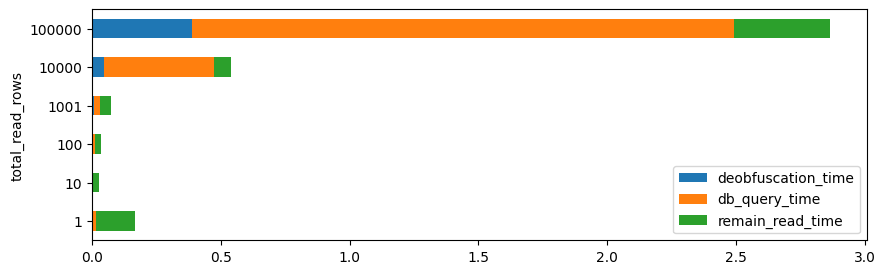

In [17]:
read_bar = read_bar.groupby('total_read_rows').mean()
read_bar.plot.barh(stacked=True,figsize=(10,3))

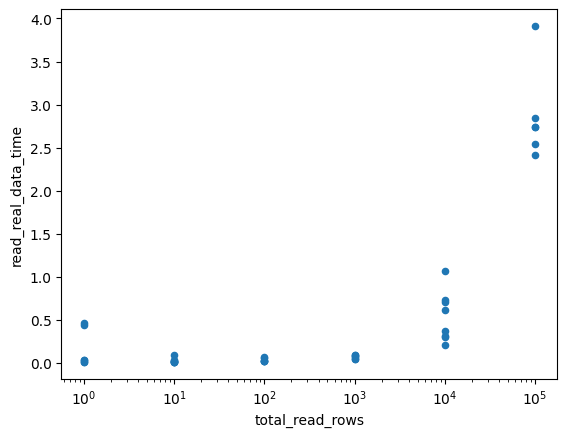

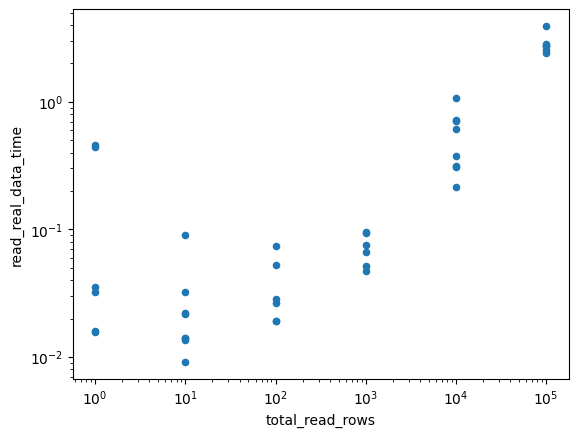

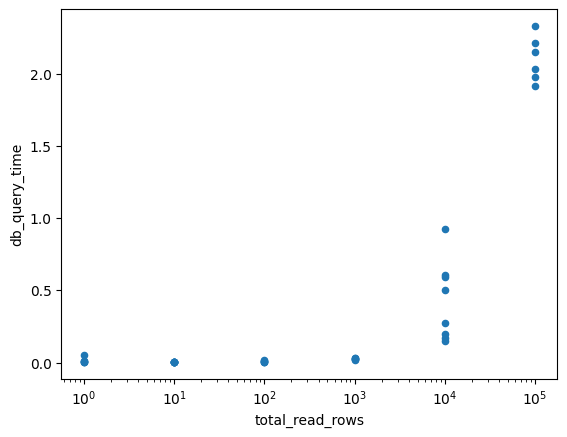

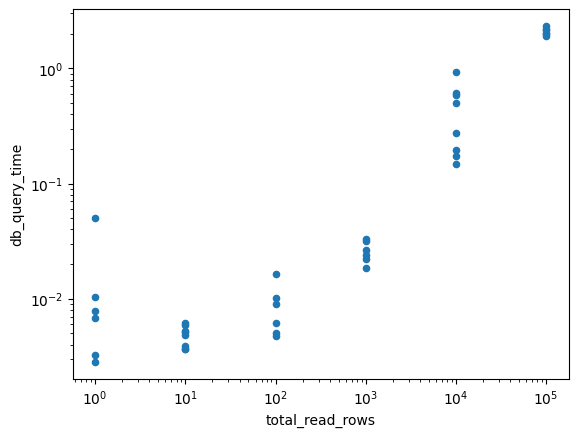

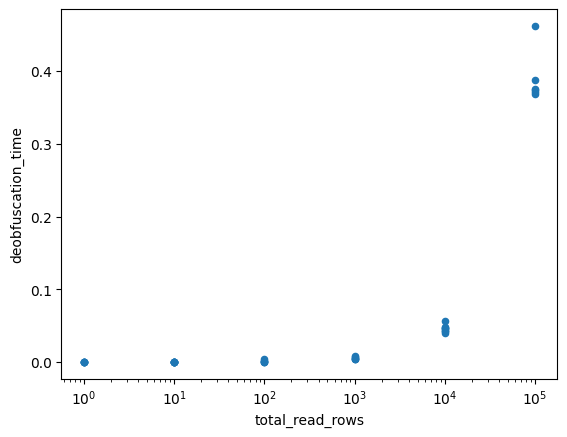

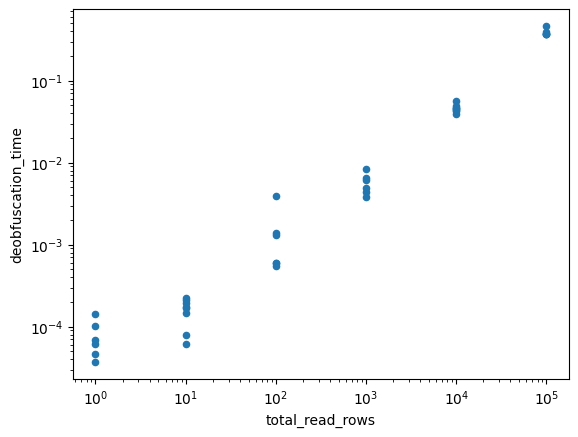

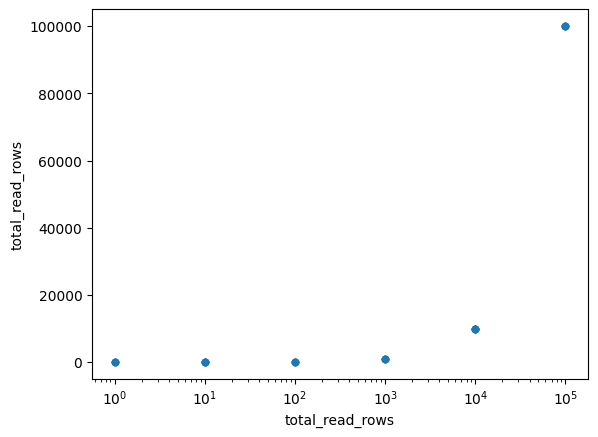

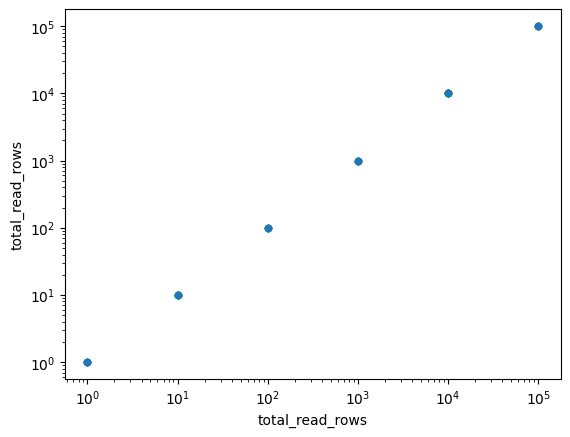

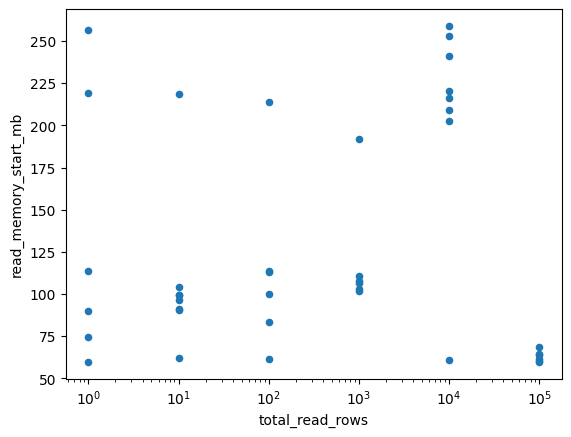

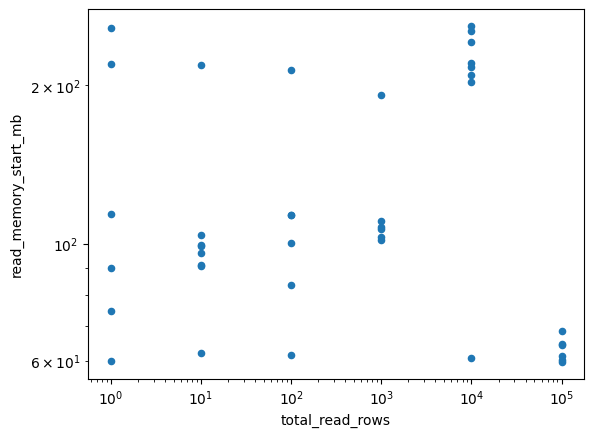

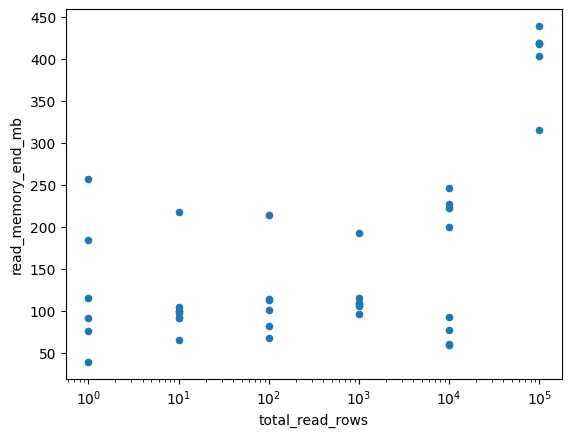

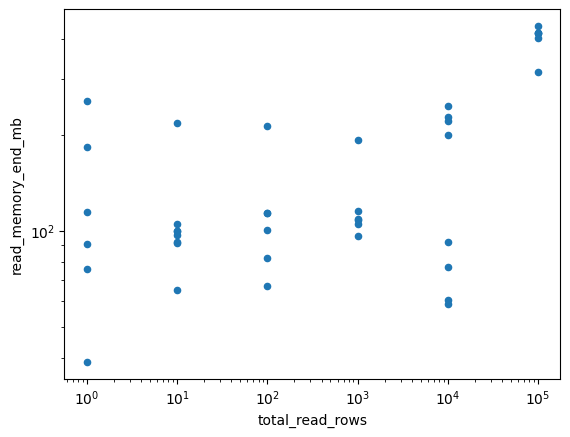

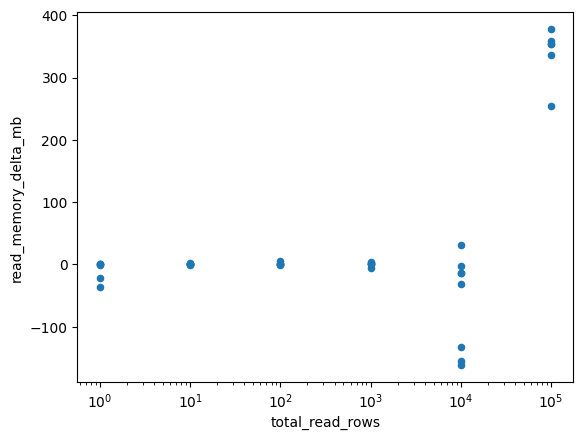

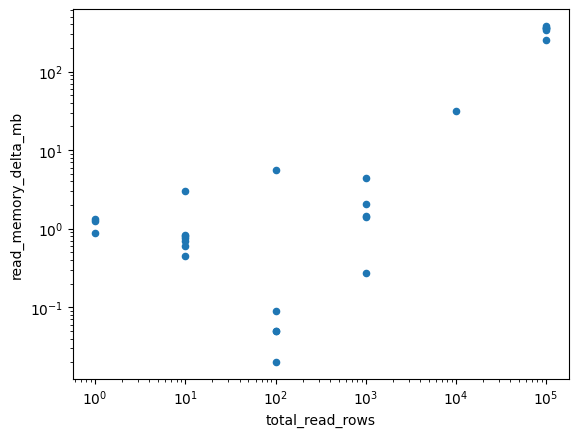

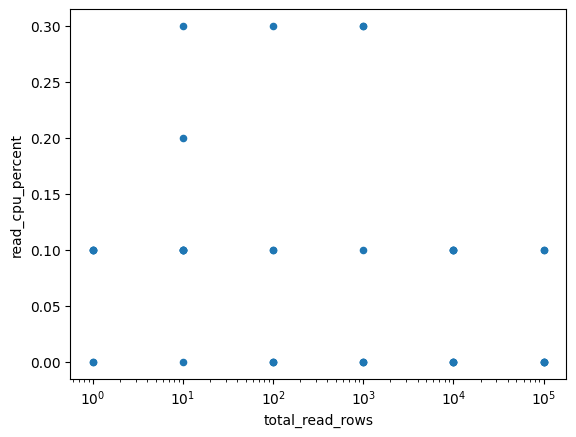

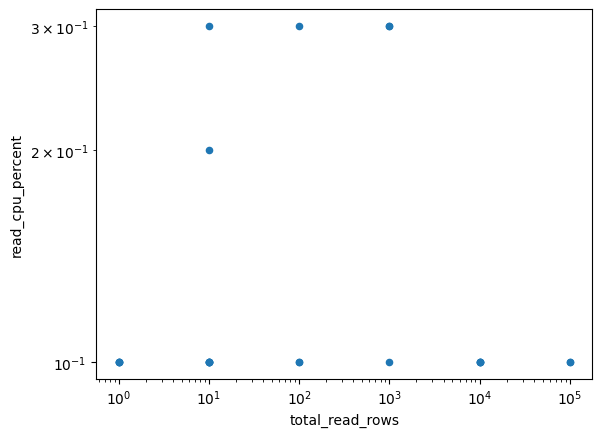

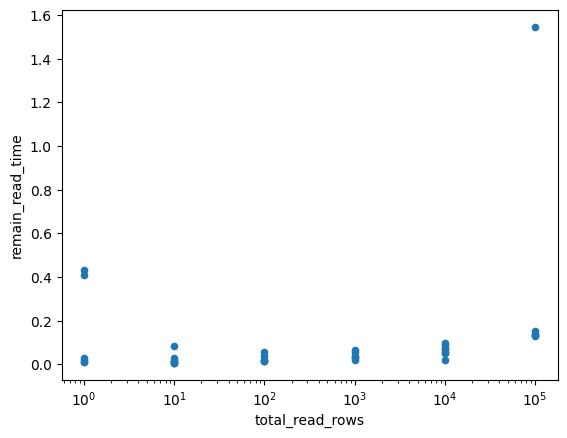

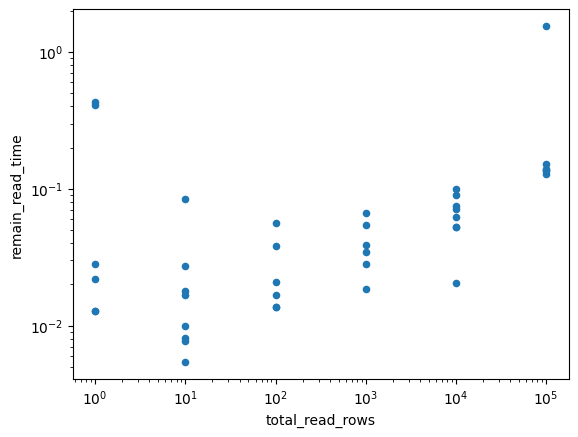

In [18]:
for i, col in enumerate(read.columns):
    ax = read.plot.scatter(x='total_read_rows', y=col,)
    ax.set_xscale('log')
    ax1 = read.plot.scatter(x='total_read_rows', y=col,)
    ax1.set_xscale('log')
    ax1.set_yscale('log')